# Import Library

In [ ]:
from zipfile import ZipFile
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from keras import layers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn  as sns 

# Import kaggle

In [ ]:
pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "alpiansyahrizqi"
os.environ['KAGGLE_KEY'] = "4ec2871806d4a125d51415bdc1e5a75a"

In [ ]:
!kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

  0% 0.00/7.43k [00:00<?, ?B/s]
100% 7.43k/7.43k [00:00<00:00, 6.25MB/s]


In [ ]:
!unzip -q body-fat-prediction-dataset.zip -d .

# Import dataset

In [ ]:
df = pd.read_csv('/content/bodyfat.csv')

In [ ]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


#  Exploratory Data Analysis

In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df['Weight'] = df['Weight'] * 0.45  #1 lbs = 0.45 kg
df['Height'] = df['Height'] * 2.54  #1 inch = 2.54 cm

In [ ]:
h_squared = (df['Height'] / 100) ** 2

df['BMI'] = df['Weight'] / h_squared #creating bmi

In [ ]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,80.515982,178.177976,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.736762
std,0.019031,8.368740,12.602040,13.225122,9.303654,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.482758
min,0.995000,0.000000,22.000000,53.325000,74.930000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,17.874982
25%,1.041400,12.475000,35.750000,71.550000,173.355000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.853241
50%,1.054900,19.200000,43.000000,79.425000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.895566
75%,1.070400,25.300000,54.000000,88.650000,183.515000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.118085
max,1.108900,47.500000,81.000000,163.417500,197.485000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.306562


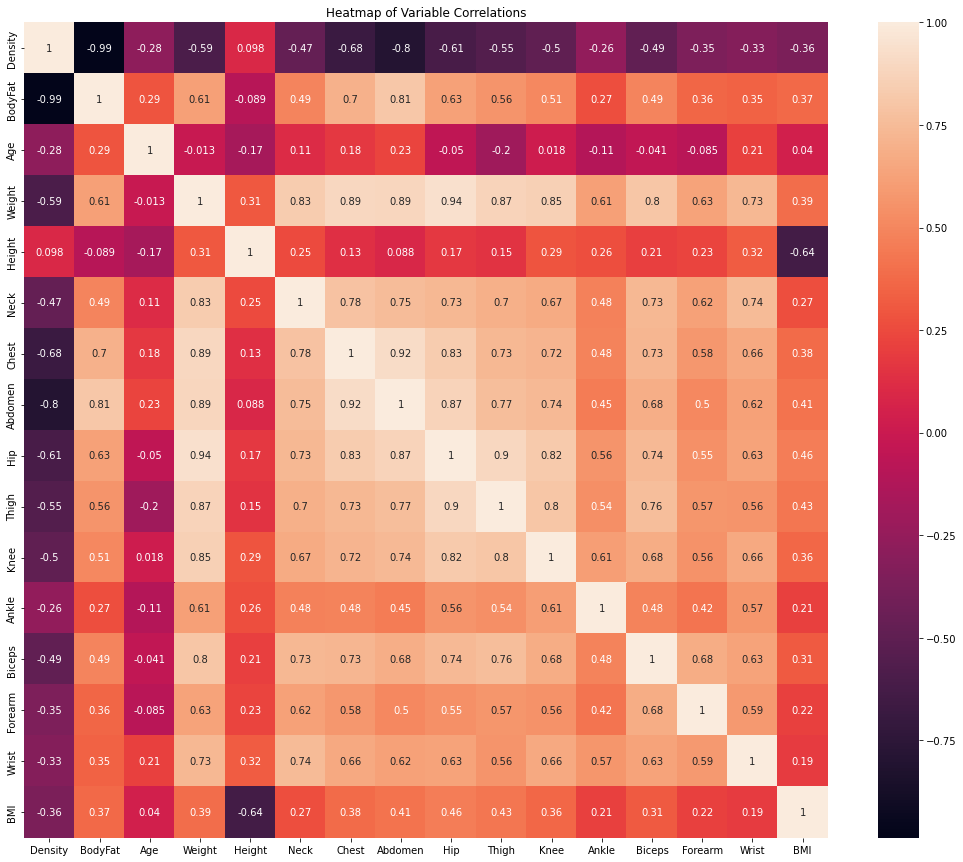

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

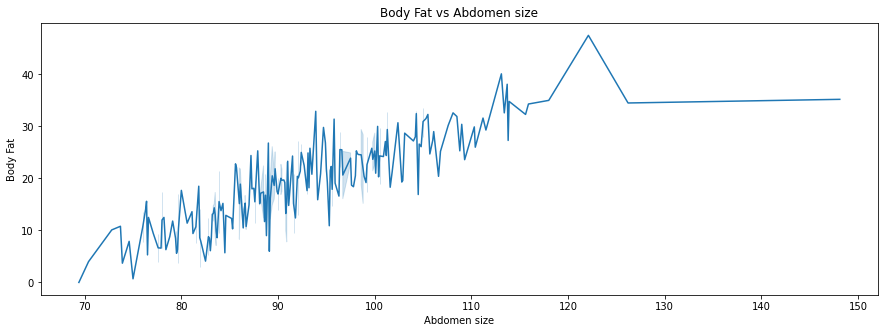

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Abdomen',y='BodyFat',data=df)
plt.title('Body Fat vs Abdomen size')
plt.xlabel('Abdomen size')
plt.ylabel('Body Fat')
plt.show()

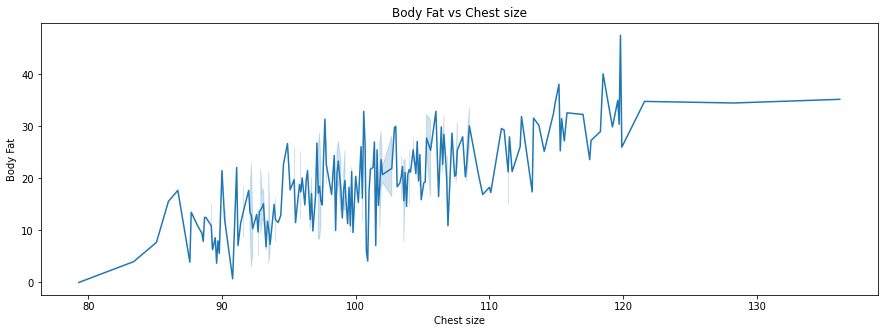

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Chest',y='BodyFat',data=df)
plt.title('Body Fat vs Chest size')
plt.xlabel('Chest size')
plt.ylabel('Body Fat')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


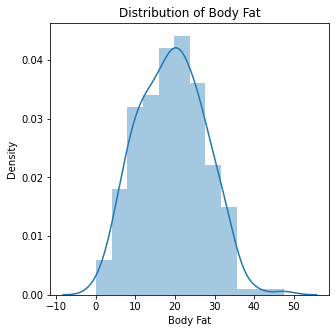

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['BodyFat'])
plt.title('Distribution of Body Fat')
plt.xlabel('Body Fat')
plt.show()

In [ ]:
df['BodyFat'].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

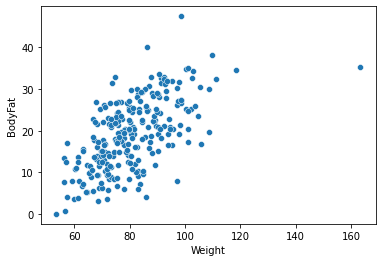

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['BodyFat'])

In [ ]:
df['Weight'].describe()

count    252.000000
mean      80.515982
std       13.225122
min       53.325000
25%       71.550000
50%       79.425000
75%       88.650000
max      163.417500
Name: Weight, dtype: float64

In [ ]:
# df = df[df.Weight != 163.417500 ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5d67e95d0>,
      dtype=object)

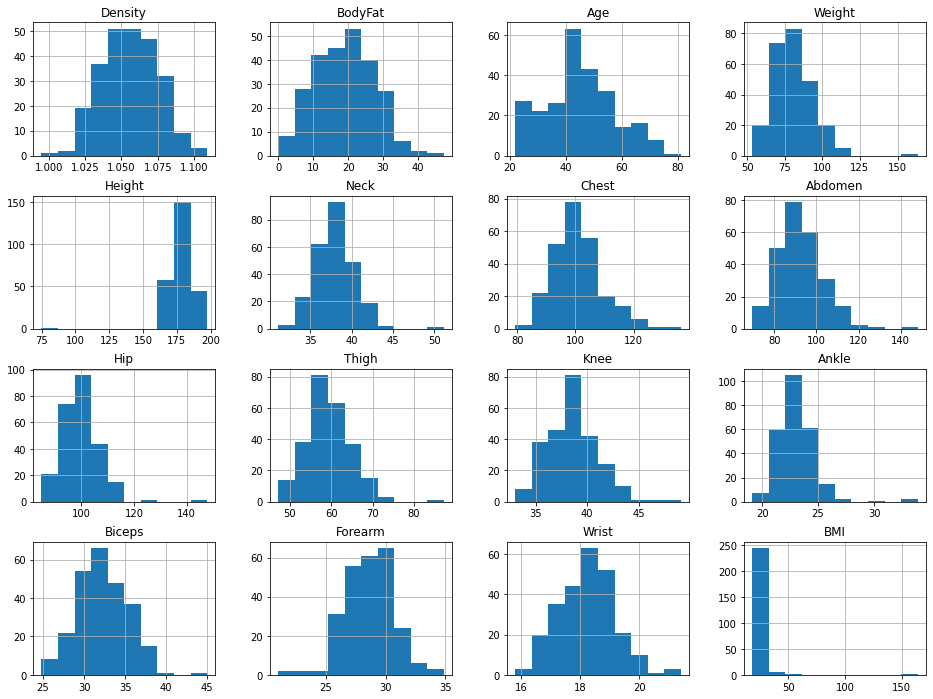

In [ ]:
df.hist(figsize=(16,12))

In [ ]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI'],
      dtype='object')

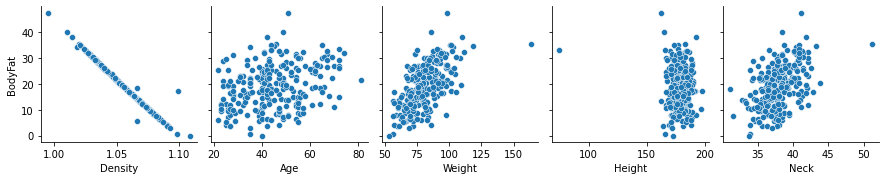

In [ ]:
sns.pairplot(df,x_vars=['Density','Age','Weight','Height','Neck'],y_vars=['BodyFat'])

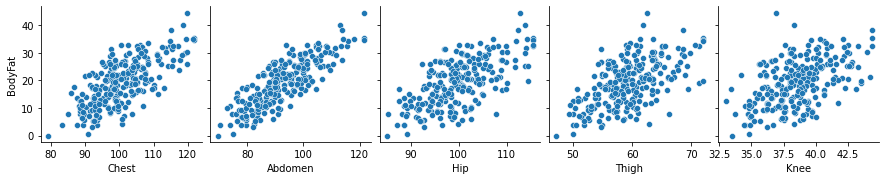

In [ ]:
sns.pairplot(df,x_vars=['Chest','Abdomen','Hip','Thigh','Knee'],y_vars=['BodyFat'])

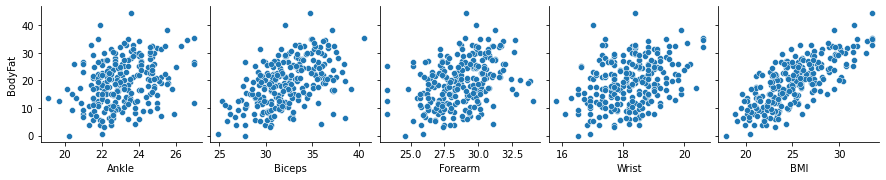

In [ ]:
sns.pairplot(df,x_vars=['Ankle','Biceps','Forearm','Wrist','BMI'],y_vars=['BodyFat'])

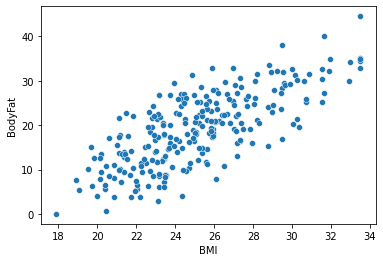

In [ ]:
sns.scatterplot(x=df['BMI'],y=df['BodyFat'])

In [ ]:
len(df.columns)

16

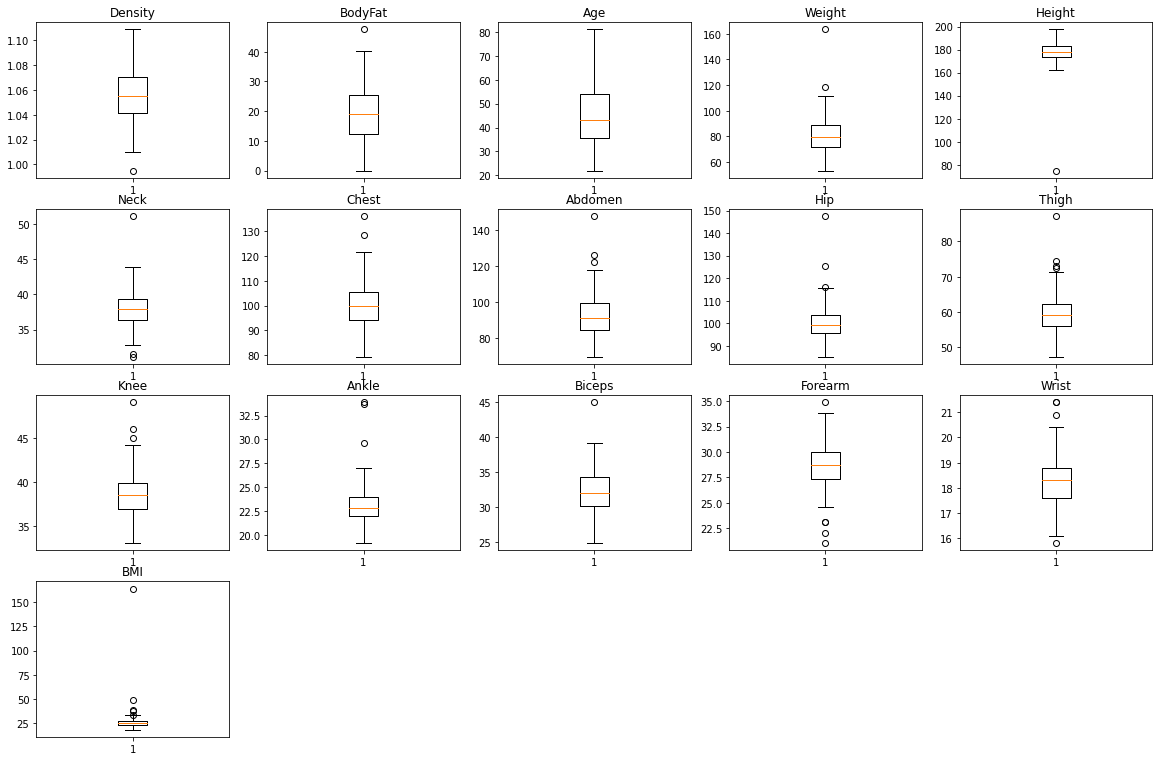

In [ ]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']:
    if px<17:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

In [ ]:
def outlier():
    l = ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]   
        lof = x[0]-1.5*iqr   
        upf = x[1]+1.5*iqr   
        df[i] = np.where(df[i]>upf,upf,(np.where(df[i]<lof,lof,df[i])))
outlier()

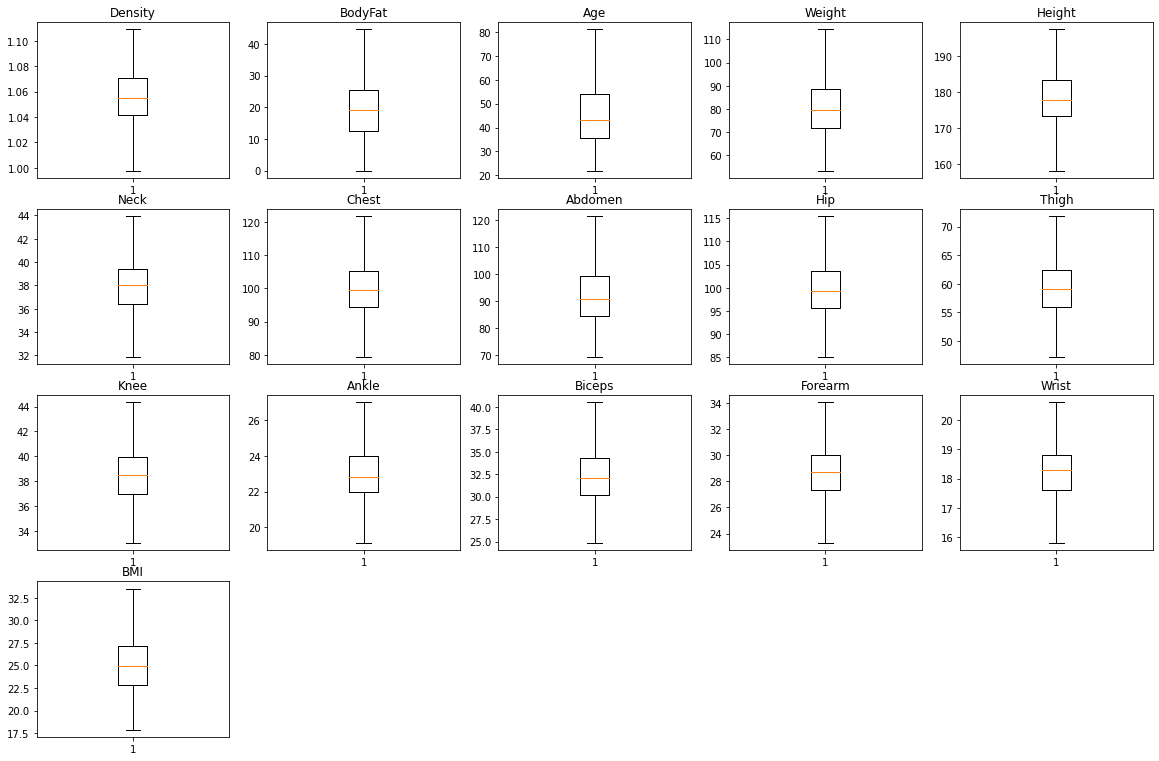

In [ ]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']:
    if px<17:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

In [ ]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055585,19.139038,44.884921,80.305446,178.508075,37.967808,100.742163,92.428770,99.735268,59.328175,38.562500,23.038095,32.255605,28.675595,18.222222,25.121930
std,0.018996,8.330753,12.602040,12.284289,6.751411,2.301730,8.161876,10.293612,6.438057,4.962811,2.321649,1.403545,2.958537,1.962956,0.911143,3.274559
min,0.997900,0.000000,22.000000,53.325000,158.115000,31.862500,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,23.250000,15.800000,17.874982
25%,1.041400,12.475000,35.750000,71.550000,173.355000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.853241
50%,1.054900,19.200000,43.000000,79.425000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.895566
75%,1.070400,25.300000,54.000000,88.650000,183.515000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.118085
max,1.108900,44.537500,81.000000,114.300000,197.485000,43.962500,121.912500,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000,33.515350


# Data preperation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('BodyFat',axis=1)
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [ ]:
scaler = StandardScaler()
col = X_train.columns
X_train = scaler.fit_transform(X_train[col])
X_train = pd.DataFrame(X_train,columns=col)
X_train.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0.920863,1.252498,-1.366614,-1.753094,-0.679252,-0.947466,-0.939638,-1.122528,-0.830150,-1.543316,-1.566910,-1.058515,-0.902439,-1.661768,-0.678085
1,-0.779431,0.395968,-0.855874,-1.379440,-0.126354,-0.118448,-0.352873,-1.234391,-0.705909,-1.365871,-1.853282,0.418058,0.272560,-1.099324,-0.217210
2,-1.777430,-0.071230,1.551903,-0.258479,1.192097,2.392292,2.003805,1.130722,0.826385,0.719105,-0.922573,0.839936,0.987777,-0.986835,2.046153
3,0.340017,-0.071230,1.032042,0.955895,1.617403,0.497394,0.310844,0.315717,0.784971,0.497299,0.724066,1.718848,-2.818198,1.262944,0.623124
4,1.628438,-0.071230,0.129126,1.329549,-0.083823,-0.071076,-0.381731,0.411600,0.225891,0.142410,0.652473,0.171962,0.221473,0.138055,-0.566464


In [ ]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)
X_test.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,-1.228267,0.785300,0.110885,-1.099200,1.192097,0.189473,0.695608,0.667288,1.095572,0.674744,-0.278236,0.839936,0.681256,0.475521,0.858402
1,-0.610458,1.252498,-0.025920,-1.753094,0.128830,0.402649,0.503226,-0.067815,0.225891,-0.434286,-0.135050,0.734466,0.425821,0.250544,1.137042
2,0.197446,-0.226963,-0.454578,0.395415,-0.679252,-1.113269,-0.324016,0.155912,0.577905,-0.301202,-0.564608,-0.566324,-0.493743,-1.549279,-0.724240
3,-0.710786,-0.226963,-0.016800,-0.818960,0.171361,0.023669,0.339702,0.091990,0.329424,-0.123758,0.724066,0.171962,0.527995,0.588010,0.510006
4,-1.365558,-1.317092,0.922598,-0.538719,0.171361,0.497394,1.147706,1.018859,1.882425,0.586021,1.511589,0.980562,0.987777,0.925477,1.486446


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
kernel = KernelRidge()
lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
dtr = DecisionTreeRegressor()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm,dtr]
hashmap={}

In [ ]:
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [ ]:
for i in clf:
    compute(i)

In [ ]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)

In [ ]:
score

,R2_score,RMSE
LinearRegression(),0.989357,0.860855
BayesianRidge(),0.988726,0.886022
Ridge(),0.988081,0.911009
SGDRegressor(),0.986721,0.961573
GradientBoostingRegressor(),0.980634,1.161234
RandomForestRegressor(),0.977506,1.251523
Lasso(),0.971720,1.403283
LGBMRegressor(),0.964503,1.572169
DecisionTreeRegressor(),0.945134,1.954583
ElasticNet(),0.863712,3.080579
